In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)
plt.rcParams["figure.figsize"] = (10, 6)
pd.set_option("display.precision", 2)
pd.set_option("display.max_colwidth", 60)
pd.set_option("display.max_columns", 100)
plt.style.use("ggplot")

In [3]:
income = pd.read_csv('us_counties_income_education.csv')
income.head(10)

,county_FIPS,state,county,per_capita_personal_income_2019,per_capita_personal_income_2020,per_capita_personal_income_2021,associate_degree_numbers_2016_2020,bachelor_degree_numbers_2016_2020,associate_degree_percentage_2016_2020,bachelor_degree_percentage_2015_2019
0,51013,VA,"Arlington, VA",97629,100687,107603,19573,132394,11.21,75.84
1,35028,NM,"Los Alamos, NM",72366,75949,81306,2766,9098,20.54,67.56
2,8013,CO,"Boulder, CO",79698,83173,89593,45834,135876,21.24,62.97
3,24027,MD,"Howard, MD",78013,82041,86380,42538,136792,19.49,62.67
4,36061,NY,"New York, NY",173525,175327,195543,167960,777483,13.43,62.18
5,51107,VA,"Loudoun, VA",82681,85568,90254,52006,160853,19.92,61.62
6,8097,CO,"Pitkin, CO",183241,187595,198939,2932,8459,21.20,61.17
7,37135,NC,"Orange, NC",66970,69593,74994,17907,55545,19.62,60.85
8,47187,TN,"Williamson, TN",95806,99408,107698,32995,91780,21.74,60.46
9,6041,CA,"Marin, CA",139891,148419,164118,44228,114604,23.22,60.16


#### Data overview

In [5]:
# Dimension
income.shape

(3006, 10)

In [6]:
# Columns
income.columns

Index(['county_FIPS', 'state', 'county', 'per_capita_personal_income_2019',
       'per_capita_personal_income_2020', 'per_capita_personal_income_2021',
       'associate_degree_numbers_2016_2020',
       'bachelor_degree_numbers_2016_2020',
       'associate_degree_percentage_2016_2020',
       'bachelor_degree_percentage_2015_2019'],
      dtype='object')

In [7]:
# Data types
income.dtypes

county_FIPS                                int64
state                                     object
county                                    object
per_capita_personal_income_2019            int64
per_capita_personal_income_2020            int64
per_capita_personal_income_2021            int64
associate_degree_numbers_2016_2020         int64
bachelor_degree_numbers_2016_2020          int64
associate_degree_percentage_2016_2020    float64
bachelor_degree_percentage_2015_2019     float64
dtype: object

In [10]:
# Generalinformation
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3006 entries, 0 to 3005
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   county_FIPS       3006 non-null   int64  
 1   state             3006 non-null   object 
 2   county            3006 non-null   object 
 3   income_2019       3006 non-null   int64  
 4   income_2020       3006 non-null   int64  
 5   income_2021       3006 non-null   int64  
 6   associate_degree  3006 non-null   int64  
 7   bachelor_degree   3006 non-null   int64  
 8   associate_pct     3006 non-null   float64
 9   bachelor_pct      3006 non-null   float64
dtypes: float64(2), int64(6), object(2)
memory usage: 235.0+ KB


In [11]:
# Describe numerical variables
income.describe()

,county_FIPS,income_2019,income_2020,income_2021,associate_degree,bachelor_degree,associate_pct,bachelor_pct
count,3006.00,3006.00,3006.00,3006.00,3.01e+03,3.01e+03,3006.00,3006.00
mean,30182.36,45947.34,49513.36,53308.48,2.14e+04,2.40e+04,31.22,22.52
std,15124.96,13356.35,13592.47,14690.29,6.52e+04,8.74e+04,5.30,9.51
min,1001.00,19286.00,21480.00,24241.00,1.60e+01,0.00e+00,5.93,0.00
25%,18125.50,38169.75,41423.25,44613.50,2.31e+03,1.23e+03,27.72,15.92
50%,29185.50,43515.50,46976.50,50513.50,5.36e+03,3.29e+03,31.17,20.23
75%,45026.50,50398.00,54357.75,58296.75,1.49e+04,1.07e+04,34.67,26.64
max,56045.00,278682.00,290674.00,318297.00,1.79e+06,2.32e+06,81.82,75.84


In [12]:
# Checking for null values
income.isna().sum()

county_FIPS         0
state               0
county              0
income_2019         0
income_2020         0
income_2021         0
associate_degree    0
bachelor_degree     0
associate_pct       0
bachelor_pct        0
dtype: int64

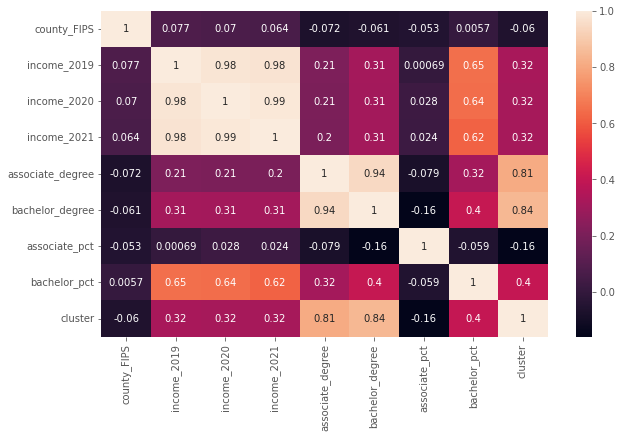

In [85]:
# Data correlation
income_corr = income.corr()
sns.heatmap(income_corr, annot=True);

#### Rename columns

In [8]:
(income.rename(columns={'per_capita_personal_income_2019':'income_2019', 
                        'per_capita_personal_income_2020':'income_2020', 
                        'per_capita_personal_income_2021':'income_2021',
                       'associate_degree_numbers_2016_2020':'associate_degree',
                       'bachelor_degree_numbers_2016_2020':'bachelor_degree',
                       'associate_degree_percentage_2016_2020':'associate_pct',
                       'bachelor_degree_percentage_2015_2019':'bachelor_pct'}, 
              inplace=True))

In [9]:
income.columns

Index(['county_FIPS', 'state', 'county', 'income_2019', 'income_2020',
       'income_2021', 'associate_degree', 'bachelor_degree', 'associate_pct',
       'bachelor_pct'],
      dtype='object')

#### Separating county and state from the column county

In [14]:
# In this operation with left alone the county names in the colum county
income['county'] = income['county'].str.split(',', expand=True)[0].copy()

#### People with income above 100000 in 2020

In [15]:
(income.query('income_2020 > 100000')
             .sort_values(by='income_2020', 
              ascending=False)
             .head(10))

,county_FIPS,state,county,income_2019,income_2020,income_2021,associate_degree,bachelor_degree,associate_pct,bachelor_pct
25,56039,WY,Teton,278682,290674,318297,4270,9789,24.01,55.05
6,8097,CO,Pitkin,183241,187595,198939,2932,8459,21.20,61.17
4,36061,NY,New York,173525,175327,195543,167960,777483,13.43,62.18
18,49043,UT,Summit,164980,174010,183972,6446,15670,23.08,56.12
9,6041,CA,Marin,139891,148419,164118,44228,114604,23.22,60.16
42,6081,CA,San Mateo,131180,142264,160485,129775,287882,23.47,52.07
12,6075,CA,San Francisco,130464,141134,160749,126806,409341,18.20,58.76
813,2060,AK,Bristol Bay Borough,136337,138387,155155,213,145,37.97,25.85
196,16013,ID,Blaine,122878,127990,134722,4289,6380,26.43,39.31
531,46127,SD,Union,118994,125786,134811,3727,3275,34.52,30.33


#### Income histograms 2019-2021

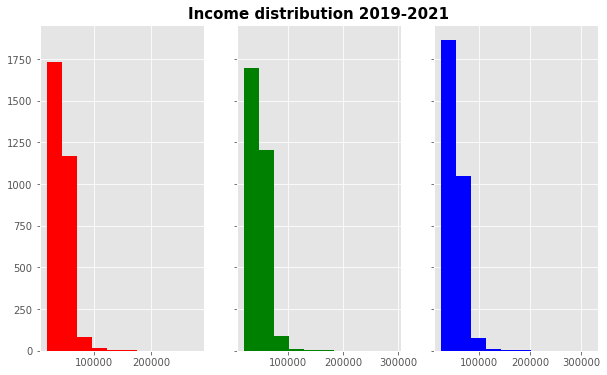

In [16]:
# Create three plots to compare the income distribution by year
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(10,6))

ax1.hist(income['income_2019'], color='r')
ax2.hist(income['income_2020'], color='g')
ax3.hist(income['income_2021'], color='b')

ax2.set_title('Income distribution 2019-2021', fontsize=15, fontweight = 'bold');

#### Income boxplots 2019-2021

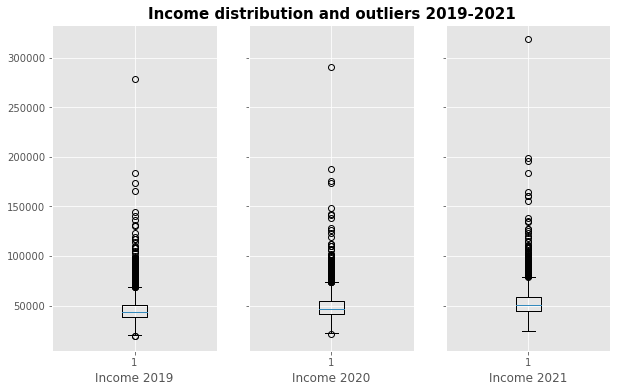

In [17]:
# We can check for outliers using boxplots

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, sharey=True)

ax1.boxplot(income['income_2019'])
ax2.boxplot(income['income_2020'])
ax3.boxplot(income['income_2021'])

ax2.set_title('Income distribution and outliers 2019-2021', fontsize=15, fontweight = 'bold')
ax1.set_xlabel('Income 2019')
ax2.set_xlabel('Income 2020')
ax3.set_xlabel('Income 2021');

In [19]:
# Check the data for max and mean of each year
income[['income_2019', 'income_2020', 'income_2021']].agg(['max', 'mean'])

,income_2019,income_2020,income_2021
max,278682.00,290674.00,318297.00
mean,45947.34,49513.36,53308.48


In [30]:
# Look for the amount of people with income above 150000 in 2021
(income[['state', 
         'county', 
         'income_2021']]
         .query('income_2021 > 150000')
         .sort_values(by='income_2021', ascending=False))

,state,county,income_2021
25,WY,Teton,318297
6,CO,Pitkin,198939
4,NY,New York,195543
18,UT,Summit,183972
9,CA,Marin,164118
12,CA,San Francisco,160749
42,CA,San Mateo,160485
813,AK,Bristol Bay Borough,155155


In [38]:
# Let's create a scatterplot to see the relation between income and bachelor_degree in 2021
fig = px.scatter(income, x='income_2021', 
           y='bachelor_degree', color_discrete_sequence=["red"],
          labels={'income_2021':"Income 2021", 
                  'bachelor_degree':'Bachelors Degree'})

fig.update_layout(title="Income 2021 and Bachelor's Degree")

### Grouping by state

In [39]:
states = income.groupby(['state'])
states

In [40]:
# We can select NY to see the data from one member of the group
states.get_group('NY').max(numeric_only=True)

county_FIPS          36123.00
income_2019         173525.00
income_2020         175327.00
income_2021         195543.00
associate_degree    365079.00
bachelor_degree     777483.00
associate_pct           34.08
bachelor_pct            62.18
dtype: float64

In [43]:
# We can add some agregate measures
states.get_group('NY').agg(['median', 'mean', 'std', 'var', 'max'], numeric_only=True)

C:\Users\equipo\AppData\Local\Temp\ipykernel_11808\2109982761.py:2: FutureWarning:

['state', 'county'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.



,county_FIPS,state,county,income_2019,income_2020,income_2021,associate_degree,bachelor_degree,associate_pct,bachelor_pct
median,36062.00,NaN,NaN,4.68e+04,5.09e+04,5.35e+04,1.83e+04,1.54e+04,29.75,26.32
mean,36062.00,NaN,NaN,5.18e+04,5.59e+04,5.94e+04,5.35e+04,8.25e+04,29.04,29.07
std,36.08,NaN,NaN,1.97e+04,1.95e+04,2.17e+04,8.16e+04,1.63e+05,3.95,9.57
var,1302.00,NaN,NaN,3.86e+08,3.79e+08,4.69e+08,6.66e+09,2.66e+10,15.57,91.53
max,36123.00,NY,Yates,1.74e+05,1.75e+05,1.96e+05,3.65e+05,7.77e+05,34.08,62.18


In [46]:
# Let's see data from the whole group
(states[['income_2019', 'income_2020', 'income_2021']]
 .max()
 .sort_values(by= 'income_2021', ascending=False)
 .head(10))

,income_2019,income_2020,income_2021
state,,,
WY,278682,290674,318297
CO,183241,187595,198939
NY,173525,175327,195543
UT,164980,174010,183972
CA,139891,148419,164118
AK,136337,138387,155155
SD,118994,125786,134811
ID,122878,127990,134722
CT,116996,119366,127391


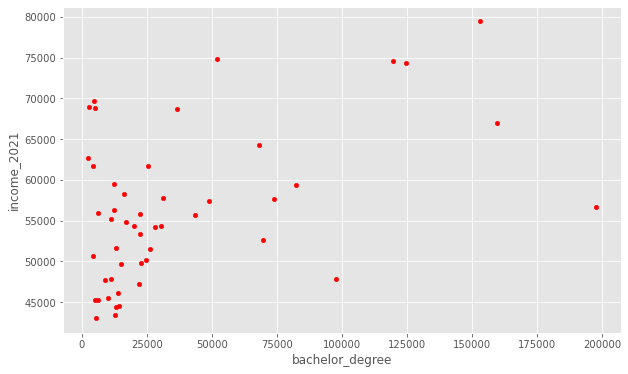

In [51]:
# We can plot states with data from 2021
(states[["bachelor_degree", "associate_degree", "income_2021"]]
 .mean()
 .sort_values(by="associate_degree", ascending=False)
 ).plot.scatter(x="bachelor_degree", y="income_2021", c='red');

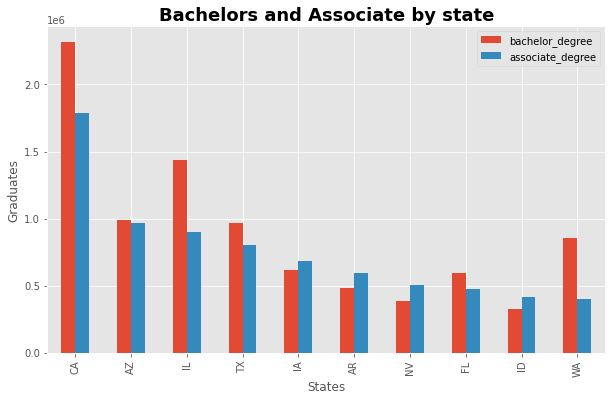

In [52]:
# We can compare bachelors and associate degrees by state
(states[["bachelor_degree", "associate_degree"]]
 .max()
 .sort_values(by="associate_degree", ascending=False)
 .head(10)).plot.bar(xlabel = "States", ylabel = "Graduates")
plt.title(label = "Bachelors and Associate by state", fontsize=18, fontweight="bold");

#### Cluster Analysis

In [53]:
# import the library from scikitlearn
from sklearn.cluster import KMeans

In [56]:
# select the variables that you want to use for clustering
features = ['income_2019', 'income_2020', 'income_2021', 'associate_degree', 'bachelor_degree', 'associate_pct', 'bachelor_pct']
X=income[features]

In [57]:
# perform k-means clustering with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)

In [58]:
# add the cluster labels to your dataset
income['cluster'] = kmeans.labels_

In [60]:
# Count the amount of individuals of each group
income['cluster'].value_counts()

0    2840
1     145
2      20
3       1
Name: cluster, dtype: int64

<AxesSubplot:xlabel='Cluster', ylabel='Individuals'>

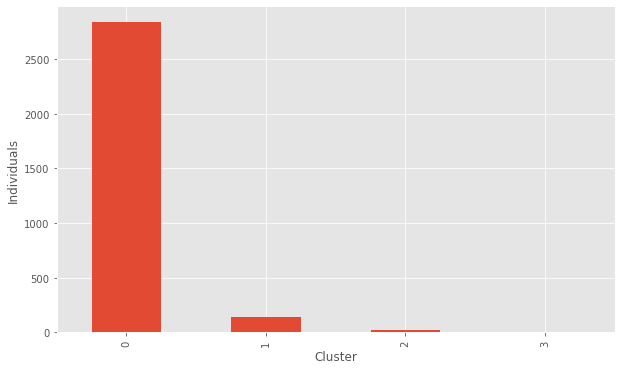

In [81]:
# It's easier to see with a simple barchart
income['cluster'].value_counts().plot.bar(xlabel="Cluster", ylabel="Individuals")

In [64]:
# Plot the clusters with plotly
# create a scatter plot with color-coded clusters
fig = px.scatter(income, x='income_2021', y='bachelor_degree', color='cluster', 
                 hover_data=['state', 'county'], title='Cluster Plot')

# show the plot
fig.show()

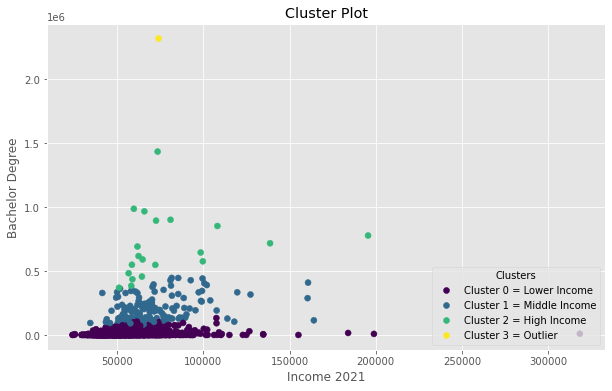

In [82]:
# We can do the same plot in matplotlib

# create a scatter plot with color-coded clusters
scatter = plt.scatter(income['income_2021'], income['bachelor_degree'], c=income['cluster'])

# add legend
legend = plt.legend(*scatter.legend_elements(), title="Clusters", loc="lower right")

# set legend labels
legend.get_texts()[0].set_text('Cluster 0 = Lower Income')
legend.get_texts()[1].set_text('Cluster 1 = Middle Income')
legend.get_texts()[2].set_text('Cluster 2 = High Income')
legend.get_texts()[3].set_text('Cluster 3 = Outlier')

# add axis labels and title
plt.xlabel('Income 2021')
plt.ylabel('Bachelor Degree')
plt.title('Cluster Plot')

# show the plot
plt.show()


In [77]:
# This cluster is a big outlier
income[income['cluster'] == 3]

,county_FIPS,state,county,income_2019,income_2020,income_2021,associate_degree,bachelor_degree,associate_pct,bachelor_pct,cluster
369,6037,CA,Los Angeles,63252,68541,74141,1788625,2317682,25.89,33.54,3
